In [1]:
!pip install -q pyomo

In [2]:
from pyomo.environ import *

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataframe=pd.read_csv('lab8_ex2.csv')
dataframe.head()

,i,Ri,Vi,Bi,Ai,Ti,Di
0,1,175,945,2800,23,2.962963,0.024339
1,2,450,832,3900,40,4.687500,0.048077
2,3,1050,2007,24900,78,12.406577,0.038864
3,4,900,800,36450,64,45.562500,0.080000
4,5,19,780,366,4,0.469231,0.005128


In [5]:
# create a model
model = ConcreteModel()

In [6]:
row=np.arange(6)

In [7]:
model.constraints = ConstraintList()

In [8]:
model.a0 = Var(domain=NonNegativeReals)
model.a1 = Var(domain=Reals)
model.a2 = Var(domain=Reals)
model.b = Var(row, domain=NonNegativeReals)

for i in row:
  model.constraints.add(expr = (model.b[i] - (dataframe['Ri'][i] - (model.a0 + model.a1*dataframe['Ti'][i] + model.a2*dataframe['Di'][i]))) >= 0)
  model.constraints.add(expr = (model.b[i] + (dataframe['Ri'][i] - (model.a0 + model.a1*dataframe['Ti'][i] + model.a2*dataframe['Di'][i]))) >= 0)

In [9]:
model.objective = Objective(expr=sum(model.b[i] for i in row), sense = minimize)

In [10]:
model.pprint()

2 Set Declarations
    b_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {0, 1, 2, 3, 4, 5}
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   12 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

4 Var Declarations
    a0 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    a1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    a2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    b : Size=6, Index=b_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  None :  None : False :  True : NonNegati

In [11]:
!apt-get install -y -qq coinor-cbc

In [12]:
opt_cbc = SolverFactory('cbc')

In [13]:
result = opt_cbc.solve(model)
print(result)


Problem: 
- Name: unknown
  Lower bound: 3986.158702
  Upper bound: 3986.158702
  Number of objectives: 1
  Number of constraints: 13
  Number of variables: 10
  Number of nonzeros: 6
  Sense: minimize
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created subproblems: None
    Black box: 
      Number of iterations: 7
  Error rc: 0
  Time: 0.03130984306335449
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [14]:
#display solution
print('\np=1')
print('\nObjective function value = ', model.objective())

print('\nDecision Variables')
print('a0 = ', model.a0())
print('a1 = ', model.a1())
print('a2 = ', model.a2())

print('\nConstraints')
model.constraints.display()


p=1

Objective function value =  3986.158753

Decision Variables
a0 =  0.0
a1 =  4.0039722
a2 =  8969.6127

Constraints
constraints : Size=12
    Key : Lower : Body                    : Upper
      1 :   0.0 :      110.34330526440641 :  None
      2 :   0.0 :   7.355935807140668e-07 :  None
      3 :   0.0 : -1.1947778943977028e-06 :  None
      4 :   0.0 :  1.1947778943977028e-06 :  None
      5 :   0.0 :   2.027175128205272e-06 :  None
      6 :   0.0 :      1303.4591979728248 :  None
      7 :   0.0 :  -6.374999657055014e-07 :  None
      8 :   0.0 :   6.374999657055014e-07 :  None
      9 :   0.0 :       57.75359965066413 :  None
     10 :   0.0 :  3.4933587400587385e-07 :  None
     11 :   0.0 :   4.785999544765218e-05 :  None
     12 :   0.0 :       6500.761352140005 :  None


In [15]:
for i in row:
  dataframe.loc[i, 'R1']=model.a0.value+model.a1.value*dataframe['Ti'][i]+model.a2.value*dataframe['Di'][i]

In [16]:
model1 = ConcreteModel()

In [17]:
model1.a0 = Var(domain=NonNegativeReals, initialize=0)
model1.a1 = Var(domain=Reals, initialize=4)
model1.a2 =Var(domain=Reals, initialize=8969)
model1.b = Var(row, domain=NonNegativeReals)

In [18]:
def funct(model1):
  sum=0
  for i in row:
    sum=sum+((abs(dataframe['Ri'][i]-(model1.a0+model1.a1*dataframe['Ti'][i]+model1.a2*dataframe['Di'][i])))**1.5)
  return sum

In [19]:
model1.objective = Objective(rule=funct, sense = minimize)

In [20]:
model1.pprint()

1 Set Declarations
    b_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {0, 1, 2, 3, 4, 5}

4 Var Declarations
    a0 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :     0 :  None : False : False : NonNegativeReals
    a1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     4 :  None : False : False :  Reals
    a2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  8969 :  None : False : False :  Reals
    b : Size=6, Index=b_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  None :  None : False :  True : NonNegativeReals
          1 :     0 :  None :  None : False :  True : NonNegativeReals
          2 :     0 :  None :  None : False :  True : NonNegativeReals
          3 :     0 :  None :  None : 

In [21]:
#We will use ipopt solver for solving the optimization problem

!wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64

In [22]:
solver = SolverFactory('ipopt', executable='/content/ipopt')

In [23]:
results = solver.solve(model1)

In [24]:
#display the statistics 
print(results)


Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 3
  Sense: unknown
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.0326688289642334
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [25]:
# display solution
print('\np=1.5')
print('\nObjective function value = ', model1.objective())

print('\nValues of Decision Variables')
print('a0 = ', model1.a0())
print('a1 = ', model1.a1())
print('a2 = ', model1.a2())


p=1.5

Objective function value =  188066.92403421347

Values of Decision Variables
a0 =  503.74058049330125
a1 =  2.7235987065639238
a2 =  4802.720279147065


In [26]:
for i in row:
  dataframe.loc[i, 'R2']=model1.a0.value+model1.a1.value*dataframe['Ti'][i]+model1.a2.value*dataframe['Di'][i]

In [27]:
def function(model1):
  sum=0
  for i in row:
    sum=sum+((abs(dataframe['Ri'][i]-(model1.a0+model1.a1*dataframe['Ti'][i]+model1.a2*dataframe['Di'][i])))**2)
  return sum

In [28]:
model1.objective.deactivate()
model1.objective1=Objective(rule=function, sense=minimize)

In [29]:
model1.pprint()

1 Set Declarations
    b_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {0, 1, 2, 3, 4, 5}

4 Var Declarations
    a0 : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :     0 : 503.74058049330125 :  None : False : False : NonNegativeReals
    a1 : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :  None : 2.7235987065639238 :  None : False : False :  Reals
    a2 : Size=1, Index=None
        Key  : Lower : Value             : Upper : Fixed : Stale : Domain
        None :  None : 4802.720279147065 :  None : False : False :  Reals
    b : Size=6, Index=b_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  None :  None : False :  True : NonNegativeReals
          1 :     0 :  None :  None : False :  True : NonNegativeReals
          2 :     0 :  None :  No

In [30]:
results =solver.solve(model1)
print(results)


Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 3
  Sense: unknown
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.04255509376525879
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [31]:
#display solution
print('\np=2')
print('\nObjective function value = ', model1.objective1())

print('\nValues of Decision Variables')
print('a0 = ', model1.a0())
print('a1 = ', model1.a1())
print('a2 = ', model1.a2())


p=2

Objective function value =  8399946.9340104

Values of Decision Variables
a0 =  884.3228326047198
a1 =  1.8562362168006301
a2 =  3097.070581130496


In [32]:
for i in row:
  dataframe.loc[i, 'R3']=model1.a0.value+model1.a1.value*dataframe['Ti'][i]+model1.a2.value*dataframe['Di'][i]

In [33]:
dataframe

,i,Ri,Vi,Bi,Ai,Ti,Di,R1,R2,R3
0,1,175,945,2800,23,2.962963,0.024339,230.171652,628.702106,965.201228
1,2,450,832,3900,40,4.687500,0.048077,449.999999,747.407462,1041.921564
2,3,1050,2007,24900,78,12.406577,0.038864,398.270402,724.183923,1027.716847
3,4,900,800,36450,64,45.562500,0.080000,899.999999,1012.052169,1216.663242
4,5,19,780,366,4,0.469231,0.005128,47.876800,529.647911,901.076249
5,6,3550,5005,38500,150,7.692308,0.029970,299.619348,668.629011,991.420871


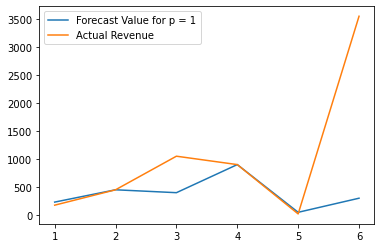

In [34]:
plt.figure()
plt.plot(dataframe['i'], dataframe['R1'], label = 'Forecast Value for p = 1')
plt.plot(dataframe['i'], dataframe['Ri'], label = 'Actual Revenue')
plt.legend()
plt.show()

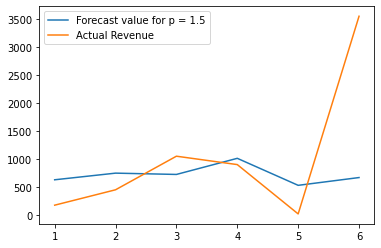

In [35]:
plt.figure()
plt.plot(dataframe['i'], dataframe['R2'], label = 'Forecast value for p = 1.5')
plt.plot(dataframe['i'], dataframe['Ri'], label = 'Actual Revenue')
plt.legend()
plt.show()

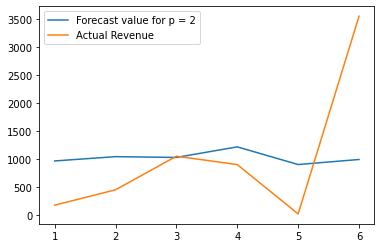

In [36]:
plt.figure()
plt.plot(dataframe['i'], dataframe['R3'], label = 'Forecast value for p = 2')
plt.plot(dataframe['i'], dataframe['Ri'], label = 'Actual Revenue')
plt.legend()
plt.show()

Answer 1) For p = 1, the optimization program is linear and can be formulated as

min $\sum_{i=1}^{6} Q_{i}$

where $Q_{i} = |R_{i} - \tilde{R_{i}}|$

The model can be assumed to be of the form $R=a_0 + a_1 T + a_2 D$ 

where R denotes the daily revenue, T denotes the daily average view-time per view, D denotes the daily average number of unskipped ads per view. Here a1 and a2 would indicate how the revenue varies with average view-time and average number
of unskipped ads, respectively, while a0 would reflect a base revenue for your videos.

$\tilde{R_{i}}$ denotes the forecasted daily revenue where $T_{i}$ denotes the daily average view-time per view for $i^{th}$ video and $D_{i}$ denotes the daily average number of unskipped ads per view for $i^{th}$ video

$\tilde{R_{i}}= a_0 + a_1 T_{i} + a_2 D_{i}\ \forall i=1\ to\ 6$

Bound/domain constraints:

$a_0 \geq 0$

$a_1, a_2 \in \mathbb{R}$

Other constraints:

$Q_{i} \geq R_{i} - \tilde{R_{i}}$

$Q_{i} \geq -(R_{i} - \tilde{R_{i}})$

Answer 4)

p=1

Status: ok

Termination condition: optimal

Objective function value =  3986.158753

Decision Variables

$a_0$ =  0.0

$a_1$ =  4.0039722

$a_2$ =  8969.6127

Observation: The value of $a_0$ is 0 so the objective function does not depend at all on the base revenue of the videos. Value of $a_2$ is very high so high revenue is generated from average number of unskipped ads.

Answer 5) For p > 1, the optimization program is non-linear and can be formulated as

min $\sum_{i=1}^{6} (Q_{i})^p$

where $Q_{i} = |R_{i} - \tilde{R_{i}}|$

The model can be assumed to be of the form $R=a_0 + a_1 T + a_2 D$ 

where R denotes the daily revenue, T denotes the daily average view-time per view, D denotes the daily average number of unskipped ads per view. Here a1 and a2 would indicate how the revenue varies with average view-time and average number
of unskipped ads, respectively, while a0 would reflect a base revenue for your videos.

$\tilde{R_{i}}$ denotes the forecasted daily revenue where $T_{i}$ denotes the daily average view-time per view for $i^{th}$ video and $D_{i}$ denotes the daily average number of unskipped ads per view for $i^{th}$ video

$\tilde{R_{i}}= a_0 + a_1 T_{i} + a_2 D_{i}\ \forall i=1\ to\ 6$

Bound/domain constraints:

$a_0 \geq 0$

$a_1, a_2 \in \mathbb{R}$

Answer 7)

p = 1.5

Status: ok

Termination condition: optimal

Time: 0.025897741317749023

Objective function value =  188066.92403421344

Values of Decision Variables

$a_0$ =  503.74058049349685

$a_1$ =  2.723598706569999

$a_2$ =  4802.720279141072

Observation: The value of $a_1$ is low so very low revenue is generated from average view time per view. The value of $a_2$ is very high so high revenue is generated from average number of unskipped ads.

p = 2

Status: ok

Termination condition: optimal

Objective function value =  8399946.934010398

Time: 0.02940201759338379

Values of Decision Variables

$a_0$ =  884.3228326047202

$a_1$ =  1.856236216800654

$a_2$ =  3097.070581130479

Observation: The value of $a_1$ is low so very low revenue is generated from average view time per view. The value of $a_2$ is very high so high revenue is generated from average number of unskipped ads.

Additional observation: The value of the objective function increases with increase in the value of p (Considering cases p=1, 1.5, 2)

Answer 8) The forecast model is not a good fit for the given data as the objective function is high in all cases. Even in the best case when p=1, variance due to points i=3 and i=6 is too high. When p=1.5 or p=2, the variance is even higher and for no value of i, the values of forecasted revenue is close to the actual revenue (except when i=3 and p=2).

Answer 9) p=1 value is good for the problem because for four values of i (i=1,2,4,5), the forecasted revenue is almost similar to the actual revenue (So, variance is less as compared to when p=1.5 or 2). We can also observe from the solution that the objective function is least when p=1. 